In [118]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn .preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
import joblib
from fastapi import FastAPI,HTTPException
from pydantic import BaseModel

import warnings
warnings.filterwarnings("ignore")

In [41]:
df=pd.read_csv("D:/datasets/fraudTest.csv")
df

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555714,555714,2020-12-31 23:59:07,30560609640617,fraud_Reilly and Sons,health_fitness,43.77,Michael,Olson,M,558 Michael Estates,...,40.4931,-91.8912,519,Town planner,1966-02-13,9b1f753c79894c9f4b71f04581835ada,1388534347,39.946837,-91.333331,0
555715,555715,2020-12-31 23:59:09,3556613125071656,fraud_Hoppe-Parisian,kids_pets,111.84,Jose,Vasquez,M,572 Davis Mountains,...,29.0393,-95.4401,28739,Futures trader,1999-12-27,2090647dac2c89a1d86c514c427f5b91,1388534349,29.661049,-96.186633,0
555716,555716,2020-12-31 23:59:15,6011724471098086,fraud_Rau-Robel,kids_pets,86.88,Ann,Lawson,F,144 Evans Islands Apt. 683,...,46.1966,-118.9017,3684,Musician,1981-11-29,6c5b7c8add471975aa0fec023b2e8408,1388534355,46.658340,-119.715054,0
555717,555717,2020-12-31 23:59:24,4079773899158,fraud_Breitenberg LLC,travel,7.99,Eric,Preston,M,7020 Doyle Stream Apt. 951,...,44.6255,-116.4493,129,Cartographer,1965-12-15,14392d723bb7737606b2700ac791b7aa,1388534364,44.470525,-117.080888,0


In [42]:
df.head(5)

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


In [43]:
df.columns

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')

In [121]:
df.shape

(555719, 23)

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             555719 non-null  int64  
 1   trans_date_trans_time  555719 non-null  object 
 2   cc_num                 555719 non-null  int64  
 3   merchant               555719 non-null  object 
 4   category               555719 non-null  object 
 5   amt                    555719 non-null  float64
 6   first                  555719 non-null  object 
 7   last                   555719 non-null  object 
 8   gender                 555719 non-null  object 
 9   street                 555719 non-null  object 
 10  city                   555719 non-null  object 
 11  state                  555719 non-null  object 
 12  zip                    555719 non-null  int64  
 13  lat                    555719 non-null  float64
 14  long                   555719 non-nu

In [45]:
df.columns

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')

In [46]:
df.isnull().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [47]:
df.duplicated().sum()

0

In [48]:
df.drop_duplicates(inplace=True)

In [49]:
df.head(2)

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0


In [50]:
df["is_fraud"].value_counts()

is_fraud
0    553574
1      2145
Name: count, dtype: int64

In [51]:
df["job"].value_counts().reset_index()

,job,count
0,Film/video editor,4119
1,Exhibition designer,3968
2,"Surveyor, land/geomatics",3756
3,Naval architect,3750
4,"Designer, ceramics/pottery",3463
...,...,...
473,Estate manager/land agent,195
474,"Engineer, civil (consulting)",194
475,Operational investment banker,11
476,Software engineer,11


In [52]:
df["category"].value_counts().reset_index()

,category,count
0,gas_transport,56370
1,grocery_pos,52553
2,home,52345
3,shopping_pos,49791
4,kids_pets,48692
5,shopping_net,41779
6,entertainment,40104
7,personal_care,39327
8,food_dining,39268
9,health_fitness,36674


In [53]:
s1=df.groupby("category")["gender"]
s2=pd.DataFrame(s1)
s2

,0,1
0,entertainment,15 F 18 F 33 F 39 ...
1,food_dining,9 F 10 M 13 M 25 ...
2,gas_transport,2028 F 2031 F 2035 F 2041 ...
3,grocery_net,2029 F 2032 M 2040 F 2045 ...
4,grocery_pos,294 F 776 M 845 M 1215 ...
5,health_fitness,2 F 6 F 26 M 49 ...
6,home,12 F 31 F 34 F 40 ...
7,kids_pets,5 F 11 M 14 F 17 ...
8,misc_net,147 F 321 M 377 M 515 ...
9,misc_pos,3 M 86 M 110 M 175 ...


In [54]:
g1=df.groupby("category")["is_fraud"].sum().reset_index()
g1

,category,is_fraud
0,entertainment,59
1,food_dining,54
2,gas_transport,154
3,grocery_net,41
4,grocery_pos,485
5,health_fitness,52
6,home,67
7,kids_pets,65
8,misc_net,267
9,misc_pos,72


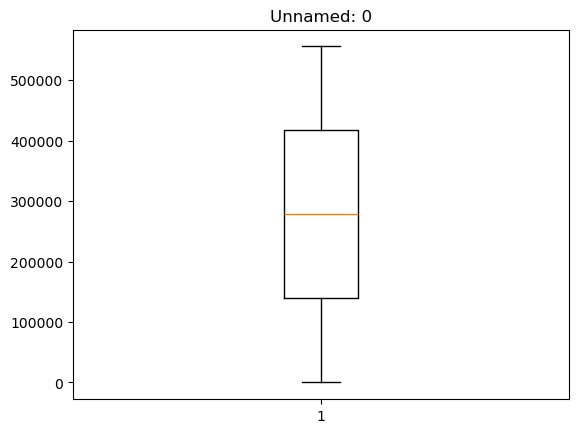

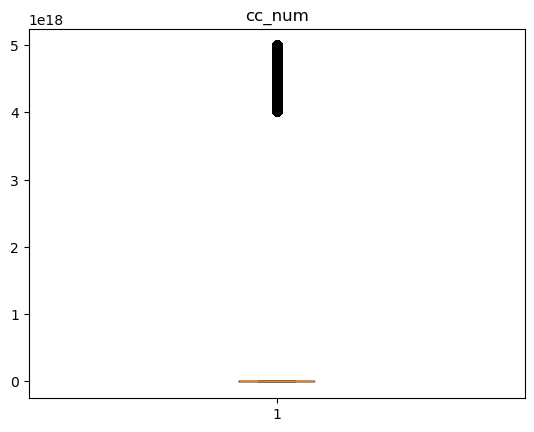

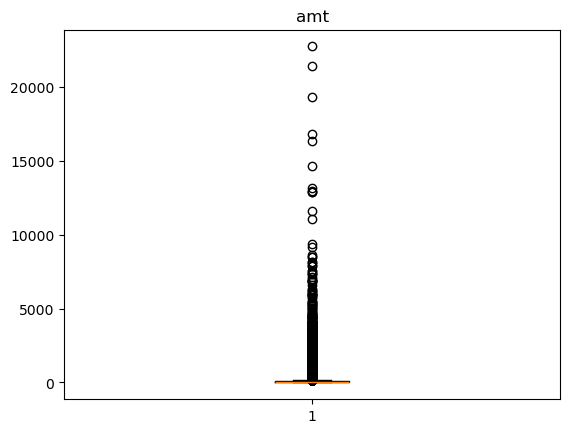

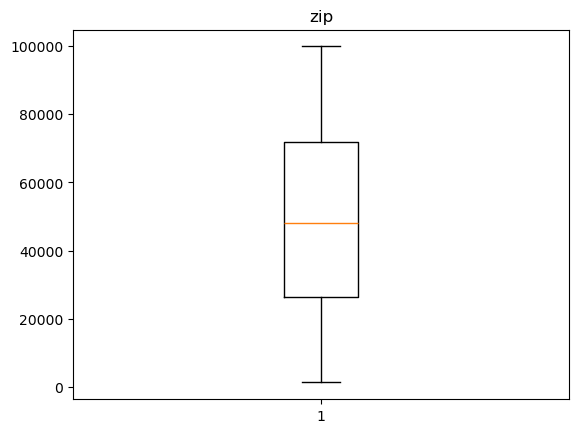

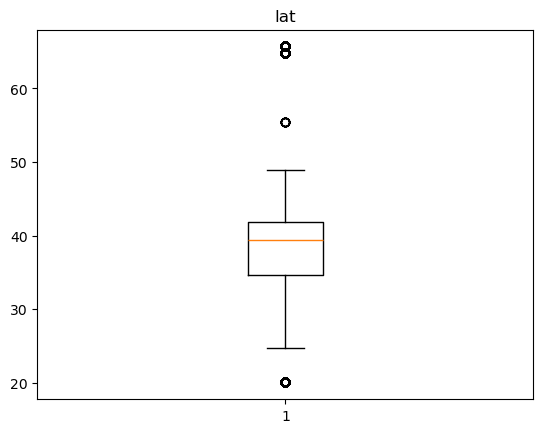

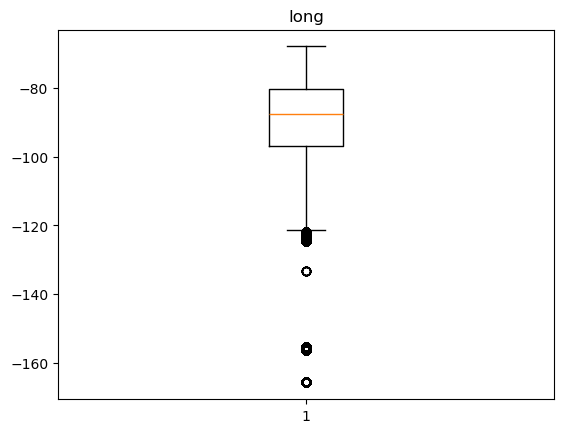

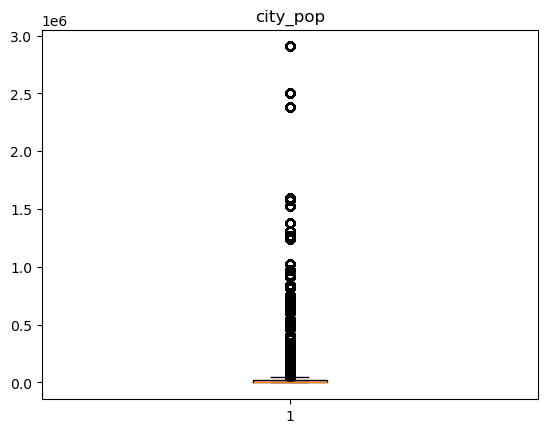

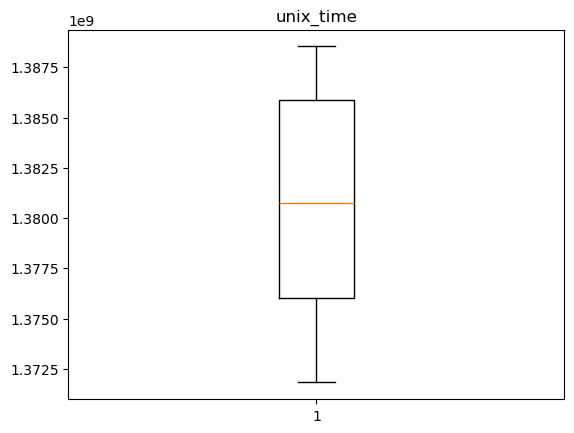

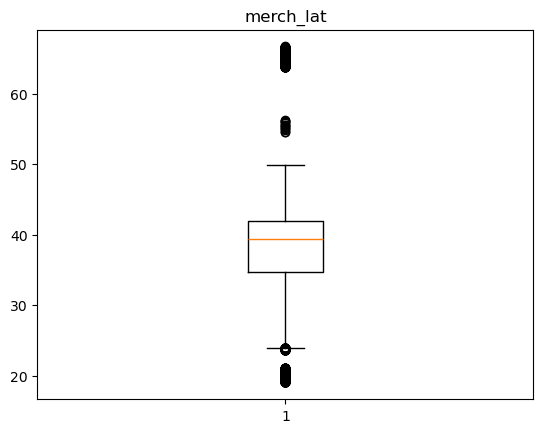

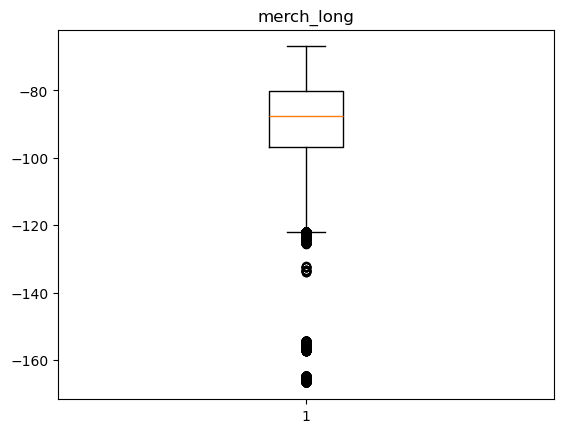

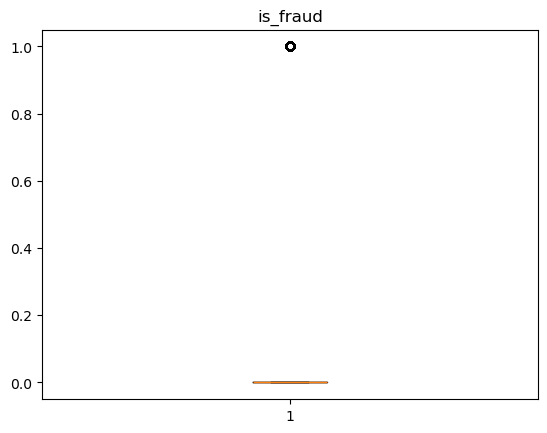

In [55]:
for i in df.columns:
    if(df[i].dtypes!="object"):
        plt.boxplot(df[i])
        plt.title(i)
        plt.show()

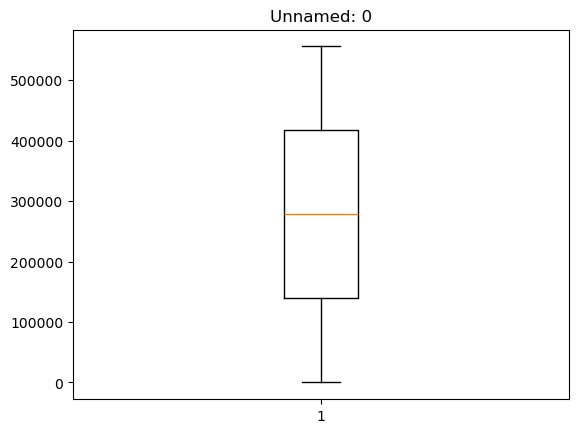

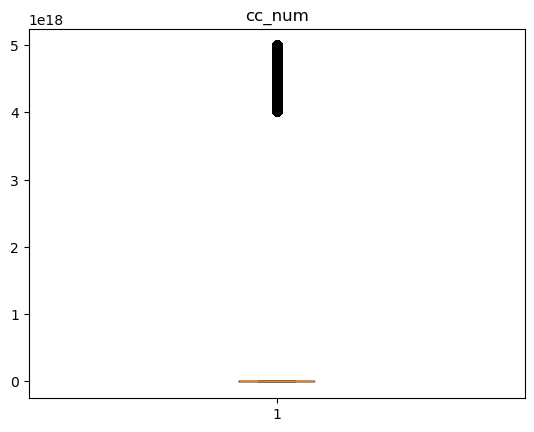

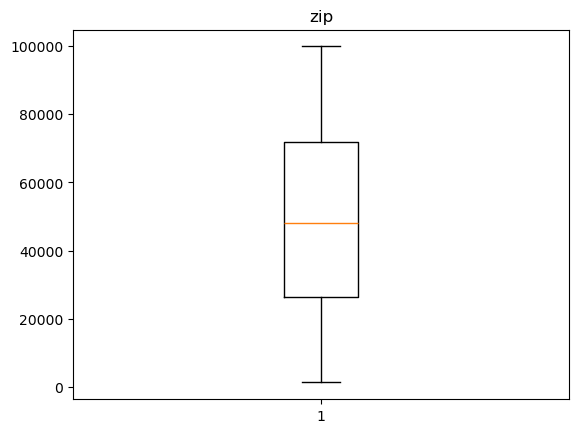

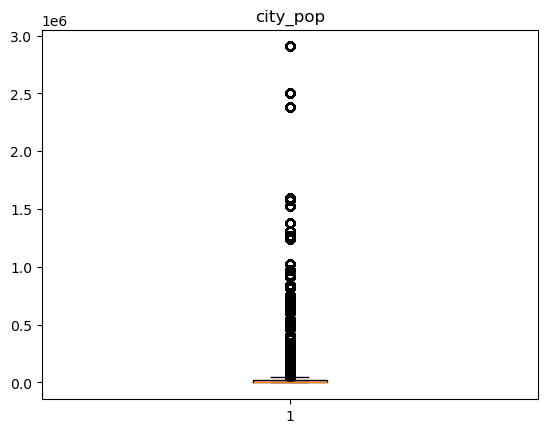

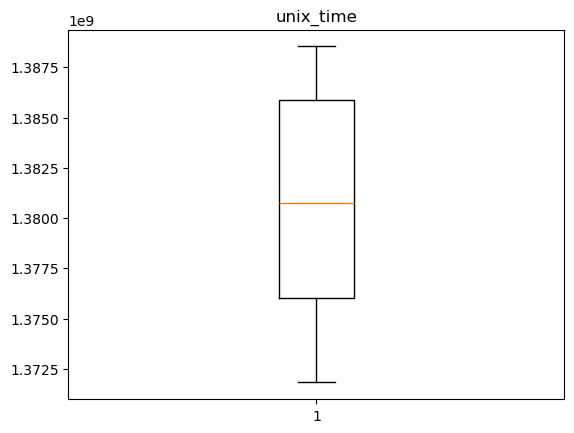

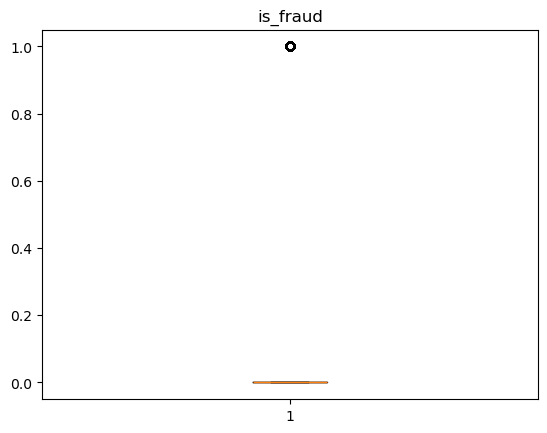

In [56]:
for i in df.columns:
    if(df[i].dtypes=="int64"):
        plt.boxplot(df[i])
        plt.title(i)
        plt.show()

In [57]:
for i in df.columns:
    print(i,"\n",df[i].value_counts()[:10])

Unnamed: 0 
 Unnamed: 0
0         1
370474    1
370488    1
370487    1
370486    1
370485    1
370484    1
370483    1
370482    1
370481    1
Name: count, dtype: int64
trans_date_trans_time 
 trans_date_trans_time
2020-12-19 16:02:22    4
2020-12-13 17:53:47    4
2020-12-17 20:36:39    4
2020-10-05 19:37:49    4
2020-12-27 01:22:37    3
2020-12-12 02:47:10    3
2020-12-07 16:13:36    3
2020-09-15 00:07:37    3
2020-12-14 23:47:36    3
2020-12-07 13:35:07    3
Name: count, dtype: int64
cc_num 
 cc_num
6538441737335434       1474
4586810168620942       1466
4745996322265          1462
4587657402165341815    1458
2242542703101233       1428
30273037698427         1426
372520049757633        1403
30270432095985         1386
4364010865167176       1375
344709867813900        1358
Name: count, dtype: int64
merchant 
 merchant
fraud_Kilback LLC                 1859
fraud_Cormier LLC                 1597
fraud_Schumm PLC                  1561
fraud_Kuhn LLC                    1521
fraud_Dick

KeyError: 10

In [59]:
for i in df.columns:
    print(i,"\n",df[i].unique()[:10])

Unnamed: 0 
 [0 1 2 3 4 5 6 7 8 9]
trans_date_trans_time 
 ['2020-06-21 12:14:25' '2020-06-21 12:14:33' '2020-06-21 12:14:53'
 '2020-06-21 12:15:15' '2020-06-21 12:15:17' '2020-06-21 12:15:37'
 '2020-06-21 12:15:44' '2020-06-21 12:15:50' '2020-06-21 12:16:10'
 '2020-06-21 12:16:11']
cc_num 
 [2291163933867244 3573030041201292 3598215285024754 3591919803438423
 3526826139003047   30407675418785  213180742685905 3589289942931264
 3596357274378601 3546897637165774]
merchant 
 ['fraud_Kirlin and Sons' 'fraud_Sporer-Keebler'
 'fraud_Swaniawski, Nitzsche and Welch' 'fraud_Haley Group'
 'fraud_Johnston-Casper' 'fraud_Daugherty LLC' 'fraud_Romaguera Ltd'
 'fraud_Reichel LLC' 'fraud_Goyette, Howell and Collier'
 'fraud_Kilback Group']
category 
 ['personal_care' 'health_fitness' 'misc_pos' 'travel' 'kids_pets'
 'shopping_pos' 'food_dining' 'home' 'entertainment' 'shopping_net']
amt 
 [  2.86  29.84  41.28  60.05   3.19  19.55 133.93  10.37   4.37  66.54]
first 
 ['Jeff' 'Joanne' 'Ashley' 'Brian

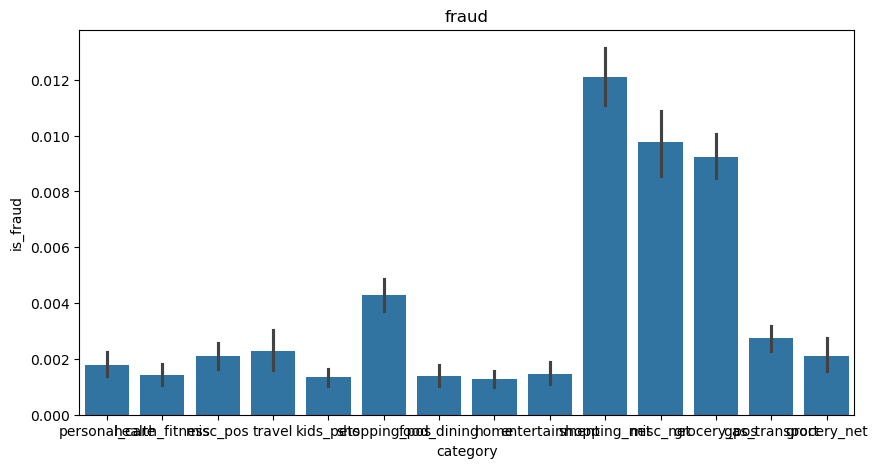

In [60]:
plt.figure(figsize=(10,5))
sns.barplot(x="category",y="is_fraud",data=df)
plt.title("fraud")
plt.show()

In [ ]:
col_list=df.select_dtypes(include="object")
for i in col_list.columns:
    df[i]=le1.fit_transform(df[i])

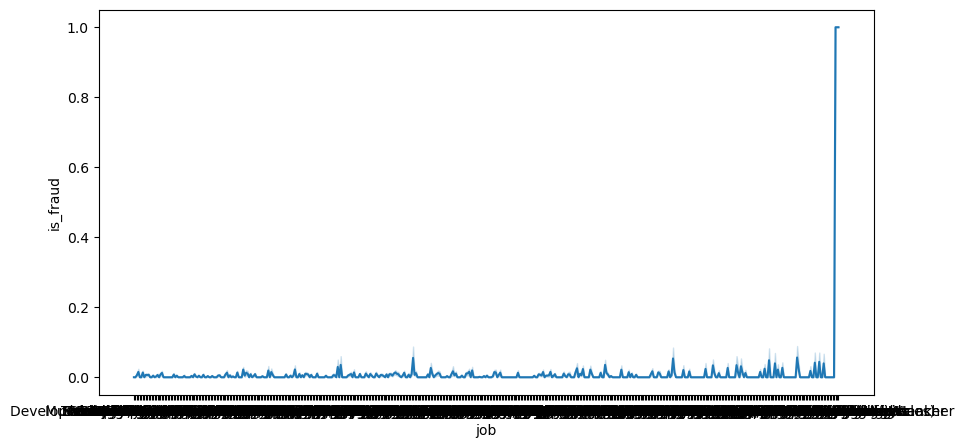

In [62]:
plt.figure(figsize=(10,5))
sns.lineplot(x="job",y="is_fraud",data=df)
plt.show()

In [84]:
x=df.drop(["is_fraud"],axis=1)
y=df["is_fraud"]

In [64]:
x

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,29209,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,84002,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,11710,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,32780,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,49632,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555714,555714,2020-12-31 23:59:07,30560609640617,fraud_Reilly and Sons,health_fitness,43.77,Michael,Olson,M,558 Michael Estates,...,63453,40.4931,-91.8912,519,Town planner,1966-02-13,9b1f753c79894c9f4b71f04581835ada,1388534347,39.946837,-91.333331
555715,555715,2020-12-31 23:59:09,3556613125071656,fraud_Hoppe-Parisian,kids_pets,111.84,Jose,Vasquez,M,572 Davis Mountains,...,77566,29.0393,-95.4401,28739,Futures trader,1999-12-27,2090647dac2c89a1d86c514c427f5b91,1388534349,29.661049,-96.186633
555716,555716,2020-12-31 23:59:15,6011724471098086,fraud_Rau-Robel,kids_pets,86.88,Ann,Lawson,F,144 Evans Islands Apt. 683,...,99323,46.1966,-118.9017,3684,Musician,1981-11-29,6c5b7c8add471975aa0fec023b2e8408,1388534355,46.658340,-119.715054
555717,555717,2020-12-31 23:59:24,4079773899158,fraud_Breitenberg LLC,travel,7.99,Eric,Preston,M,7020 Doyle Stream Apt. 951,...,83643,44.6255,-116.4493,129,Cartographer,1965-12-15,14392d723bb7737606b2700ac791b7aa,1388534364,44.470525,-117.080888


In [65]:
y

0         0
1         0
2         0
3         0
4         0
         ..
555714    0
555715    0
555716    0
555717    0
555718    0
Name: is_fraud, Length: 555719, dtype: int64

In [66]:
le1=LabelEncoder()

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype 
---  ------                 --------------   ----- 
 0   Unnamed: 0             555719 non-null  int64 
 1   trans_date_trans_time  555719 non-null  object
 2   cc_num                 555719 non-null  int64 
 3   merchant               555719 non-null  object
 4   category               555719 non-null  object
 5   amt                    555719 non-null  int64 
 6   first                  555719 non-null  object
 7   last                   555719 non-null  object
 8   gender                 555719 non-null  object
 9   street                 555719 non-null  object
 10  city                   555719 non-null  object
 11  state                  555719 non-null  object
 12  zip                    555719 non-null  int64 
 13  lat                    555719 non-null  int64 
 14  long                   555719 non-null  int64 
 15  

In [69]:
tr=train_test_split

In [98]:
x_train,x_test,y_train,y_test=tr(x,y,test_size=0.20,random_state=42)

In [71]:
x_train

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long
139526,139526,2020-08-09 11:30:44,374125201044065,"fraud_Christiansen, Goyette and Schamberger",gas_transport,61.74,Christopher,Gilbert,M,20937 Reed Lakes Apt. 271,...,20012,38.9757,-77.0282,601723,"Optician, dispensing",1970-07-20,c738b10b4f58c3e95cb0eeea7556a8ed,1376047844,38.368797,-76.170115
395747,395747,2020-11-23 15:11:14,3527536963490470,fraud_Turcotte-Halvorson,misc_pos,186.93,Teresa,Stein,F,2838 White Fields Apt. 473,...,29911,32.9413,-81.1807,1725,Social researcher,1974-12-05,c7082601037e96bc0513c6e910c3f889,1385219474,32.342834,-81.123567
395119,395119,2020-11-23 11:06:10,3558881852140592,fraud_Pacocha-O'Reilly,grocery_pos,127.61,Christopher,Holt,M,05597 Michael Spurs,...,86018,35.2563,-111.9500,759,"Geologist, engineering",1957-03-28,c1d2d3499a9e0ca17e6c31010a42936a,1385204770,36.255327,-112.176851
552207,552207,2020-12-30 23:14:30,3534718226968689,fraud_Fahey Inc,kids_pets,16.46,Lisa,Lopez,F,32343 Saunders Course,...,62926,37.3712,-89.1349,2263,Scientific laboratory technician,1984-09-13,3a431959b9e205786018f55990959b45,1388445270,38.239454,-88.922320
487836,487836,2020-12-16 16:53:04,4998109455173950,"fraud_Hyatt, Russel and Gleichner",health_fitness,47.61,Mary,Pruitt,F,2819 Luke Greens Suite 563,...,64114,38.9621,-94.5959,545147,Counsellor,1987-11-18,6ae43e4cfecf6d5a5709aefb7c6a5d6e,1387212784,39.306352,-94.958490
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110268,110268,2020-07-29 08:13:47,377234009633447,"fraud_Rowe, Batz and Goodwin",grocery_pos,104.25,Theresa,Blackwell,F,43576 Kristina Islands,...,25442,39.3716,-77.8229,1925,Systems developer,1966-02-14,bb6ca8c1b5034ba8a0a8cf9f0e61d553,1375085627,38.955449,-77.031434
259178,259178,2020-09-24 15:05:31,4992346398065154184,"fraud_Koss, Hansen and Lueilwitz",home,89.37,Benjamin,Kim,M,920 Patrick Light,...,61335,41.1730,-89.2187,532,Audiological scientist,1956-01-09,ffe8dee3a48cb1fdc985e7fb3c7f8139,1380035131,40.448929,-88.357932
365838,365838,2020-11-10 03:23:15,4550599031376731,"fraud_Kerluke, Kertzmann and Wiza",misc_net,5.07,Angela,West,F,9471 Wong Islands,...,44902,40.7559,-82.5123,92985,Press photographer,1968-05-29,ea12c7c3c04e054e51b12dc5cfd08b5b,1384053795,41.533541,-82.797399
131932,131932,2020-08-06 07:26:27,342351256941125,fraud_Rutherford-Mertz,grocery_pos,201.98,Rebecca,Obrien,F,5619 Mendoza Inlet,...,31046,33.1194,-83.8235,3343,Theatre manager,1990-06-08,b6ee85d599affcbb1375184847ae81e8,1375773987,32.871628,-84.091574


In [72]:
y_train

139526    0
395747    0
395119    0
552207    0
487836    0
         ..
110268    0
259178    0
365838    0
131932    0
121958    0
Name: is_fraud, Length: 444575, dtype: int64

In [75]:
le=LinearRegression()

In [87]:
a1=le.fit(x_train,y_train)
a1

LinearRegression()

In [88]:
y_pred=le.predict(x_test)
y_pred

array([-0.00589583,  0.00950975, -0.00417564, ...,  0.03745126,
       -0.00475049,  0.01119408])

In [89]:
from sklearn.metrics import *

In [123]:
print(r2_score(y_test,y_pred))

0.3614021054377714


In [122]:
confusion_matrix(y_test,y_pred)

array([[110569,    149],
       [   122,    304]], dtype=int64)

In [90]:
df.tail(2)

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
555717,555717,544758,4079773899158,75,13,699,111,342,1,663,...,825,72,129,58,331,43546,1388534364,490828,40501,0
555718,555718,544759,4170689372027579,125,0,3713,280,145,1,778,...,252,204,116001,276,813,50595,1388534374,173243,136289,0


In [92]:
sc=StandardScaler()

In [93]:
x_train[["trans_date_trans_time","amt"]]=sc.fit_transform(x_train[["trans_date_trans_time","amt"]])

In [94]:
x_test[["trans_date_trans_time","amt"]]=sc.fit_transform(x_test[["trans_date_trans_time","amt"]])

In [95]:
x_train[["trans_date_trans_time","amt"]]

,trans_date_trans_time,amt
139526,-0.863000,0.011077
395747,0.738203,1.955261
395119,0.734299,1.040195
552207,1.703808,-0.696353
487836,1.306750,-0.209682
...,...,...
110268,-1.045743,0.675231
259178,-0.116000,0.442754
365838,0.551022,-0.874304
131932,-0.910631,2.183676


In [96]:
x_test[["trans_date_trans_time","amt"]]

,trans_date_trans_time,amt
119106,-0.990103,-0.935487
179292,-0.614379,0.525639
540729,1.634686,-0.465506
374360,0.605426,0.184471
314574,0.231334,-0.796718
...,...,...
444284,1.040115,-0.824254
89444,-1.175390,2.227278
298536,0.130993,2.996734
301993,0.152510,-0.745379


In [105]:
smote = SMOTE(random_state=42)
x_train_bal, y_train_bal = smote.fit_resample(x_train,y_train)
print(f"Balanced training set: {x_train_bal.shape}")

Balanced training set: (885712, 22)


In [100]:
smote

SMOTE(random_state=42)

In [101]:
model = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42, n_jobs=-1)
model.fit(x_train_bal, y_train_bal)

RandomForestClassifier(class_weight='balanced', n_jobs=-1, random_state=42)

In [103]:
y_pred=model.predict(x_test)

In [108]:
print(confusion_matrix(y_test, y_pred))

[[110569    149]
 [   122    304]]


In [109]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    110718
           1       0.67      0.71      0.69       426

    accuracy                           1.00    111144
   macro avg       0.83      0.86      0.85    111144
weighted avg       1.00      1.00      1.00    111144



In [111]:
confusion_matrix(y_test,y_pred)

array([[110569,    149],
       [   122,    304]], dtype=int64)

In [124]:
r2_score(y_test,y_pred)

0.3614021054377714

In [113]:
joblib.dump(model, 'fraud_model.pkl')
joblib.dump(sc, 'scaler.pkl')
print("Model saved as fraud_model.pkl")

Model saved as fraud_model.pkl


In [114]:
app = FastAPI(title="Credit Card Fraud Detection API")

In [125]:
class Transaction(BaseModel):
    Time: float
    V1: float
    V2: float
    V3: float
    V4: float
    V5: float
    V6: float
    V7: float
    V8: float
    V9: float
    V10: float
    V11: float
    V12: float
    V13: float
    V14: float
    V15: float
    V16: float
    V17: float
    V18: float
    V19: float
    V20: float
    V21: float
    V22: float
    V23: float
    V24: float
    V25: float
    V26: float
    V27: float
    V28: float
    Amount: float

@app.post("/predict")
async def predict_fraud(transaction: Transaction):
    try:

        model = joblib.load('fraud_model.pkl')
        scaler = joblib.load('scaler.pkl')
        
        data = pd.DataFrame([transaction.dict()])
        data[['trans_date_trans_time', 'amt']] = scaler.transform(data[['trans_date_trans_time', 'amt']])
   
        proba = model.predict_proba(data)[0][1]
        label = 1 if proba > 0.5 else 0 
        
        return {
            "is_fraud_probability": float(proba),
            "is_fraud_label": int(label), 
            "confidence": float(max(proba, 1-proba))
        }
    except Exception as e:
        raise HTTPException(status_code=400, detail=f"Prediction failed: {str(e)}")

if __name__ == "__main__":
    print("Training complete!")
    print("Start API server: uvicorn fraud_detection:app --reload")
    print("Test: curl -X POST 'http://127.0.0.1:8000/predict' -d '{\"Time\":0,\"V1\":-1.36,...}'")

Training complete!
Start API server: uvicorn fraud_detection:app --reload
Test: curl -X POST 'http://127.0.0.1:8000/predict' -d '{"Time":0,"V1":-1.36,...}'
